<a href="https://colab.research.google.com/github/abhijeetraj22/TSF-GRIP_IOT_Tasks/blob/main/TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GRIP The Sparks Foundation(TSF)
**IOT and Computer Vision Internship**

##Task-1 Object Detection / Optical Character Recognition (ORC)

#####In this task, I tried to 

- Implement an object detector which identifies the classes of the objects in an image or video.
- Character detector which extracts printed or handwritten text from an
image or video.

##Steps - 
###Object Detection
- Step 1 - Importing the Libraries
- Step 2 -  Initializing the weights file ,config file and names file for detection
- Step 3 - Initializing the pre-trained model
- Step 4 - Classes which we are going to predict & Output Layers
- Step 5 - Loading & Plotting the image
- Step 6 - Extracting Features ie. detecting objects
- Step 7 - Lets run this object detection on an image
- Conclusion

### Optical Character Recognition
- Step 1 - Importing the Libraries
- Step 2 -  Loading & Plotting the image
- Step 3 - Converting BGR image to grayscale
- Step 4 - Performing OCR
- Step 5 - Visualizing output
- Conclusion


####Created by - Abhijeet Raj Modanwal


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# YOLO

YOLO is popular because it achieves high accuracy while also being able to run in real-time. The algorithm “only looks once” at the image in the sense that it requires only one forward propagation pass through the neural network to make predictions. 

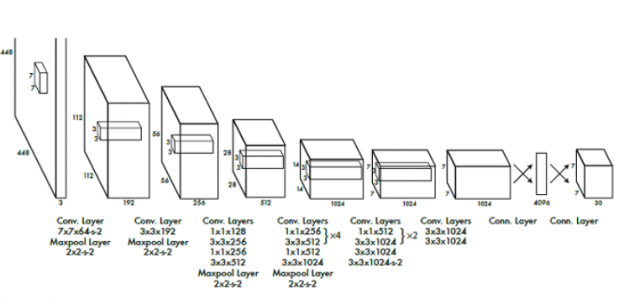

YOLO trains on full images and directly optimizes detection performance. This model has a number of benefits over other object detection methods:

- YOLO is extremely fast
- YOLO sees the entire image during training and test time so it implicitly encodes contextual information about classes as well as their appearance.
- YOLO learns generalizable representations of objects so that when trained on natural images and tested on artwork, the algorithm outperforms other top detection methods.

## Object Detection
*Implement an object detector which identifies the classes of the objects in an image or video.*

In [3]:
!pip3 install --upgrade opencv-python

     |████████████████████████████████| 51.0MB 64kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


### STEP 1 - Importing the Libraries, Config files and Model graphs

In [4]:
from google.colab.patches import cv2_imshow

In [5]:
#importing the required libraries
import cv2 as cv 
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

### STEP 2 - Initializing the weights file ,config file and names file for detection

In [6]:
# Copy the neural network architecture
cfg_file = '/content/drive/MyDrive/Grip/yolov3.cfg'

# Copy the pre-trained weights
weight_file = '/content/drive/MyDrive/Grip/yolov3.weights'

# Copy the names of the classes
namesfile = '/content/drive/MyDrive/Grip/coco.names'

In [7]:
#loading yolov3 by passing weights and cfg files
net = cv.dnn.readNet(weight_file,cfg_file)
classes=[]
with open(namesfile,"r") as f:
    classes = [line.strip() for line in f.readlines()]


### STEP 3 - Initializing the pre-trained model

In [8]:
model = cv.dnn_DetectionModel(net)

### STEP 4 - Classes which we are going to predict & Output Layers

In [9]:
#there are 80 labels that yolov3 can identify
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [10]:
#defining the output layers
print(net.getLayerNames())

['conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'leaky_

In [11]:
net.getUnconnectedOutLayers()

array([[200],
       [227],
       [254]], dtype=int32)

In [12]:
layer_names = net.getLayerNames()

In [13]:
outputLayers= [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]

In [14]:
outputLayers

['yolo_82', 'yolo_94', 'yolo_106']

In [15]:
colors = np.random.uniform(0,255,size=(len(classes),3))

### STEP 5 - Loading & Plotting the image

In [16]:
img = cv.imread("/content/drive/MyDrive/Grip/Parsons_PR.jpg")
h,w,c= img.shape

shape of image: 


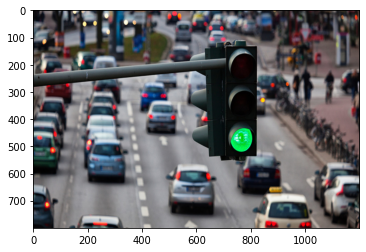

In [17]:
# displaying the original image
%matplotlib inline
def image_and_shapes(image):
    img= plt.imread(image)
    plt.imshow(img)
    print("shape of image: ".format(img.shape))
image_and_shapes("/content/drive/MyDrive/Grip/Parsons_PR.jpg")

### STEP 6 - Extracting Features ie. detecting objects

In [18]:
#extracting features ie. detecting objects

blob = cv.dnn.blobFromImage(img,0.00392,(416,416),(0,0,0),True, crop= False)

In [19]:
net.setInput(blob)
outs = net.forward(outputLayers)
print(outs[1])

[[0.01989063 0.02711788 0.0433171  ... 0.         0.         0.        ]
 [0.02164415 0.02626262 0.36620045 ... 0.         0.         0.        ]
 [0.02371548 0.02133686 0.07768885 ... 0.         0.         0.        ]
 ...
 [0.9748134  0.9698876  0.04519611 ... 0.         0.         0.        ]
 [0.97805065 0.9744495  0.31079987 ... 0.         0.         0.        ]
 [0.9758672  0.9796181  0.08199455 ... 0.         0.         0.        ]]


In [20]:
#finding confidence score of algorithm in object detection in blob
class_ids=[]
confidences =[]
boxes =[]
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        
        #object detected
        if confidence > 0.7:
            center_x= int(detection [0] * w)
            center_y= int(detection [1] * h)
            ww = int(detection [2] * w)
            hh = int(detection [3] * h)
            
            #coordinates of a rectangle
            x= int(center_x - ww/2)
            y= int(center_y - hh/2)
            
            boxes.append([x,y,ww,hh])
            confidences.append(float(confidence)) 
            class_ids.append(class_id)

### STEP 7 - Lets run this object detection on an image

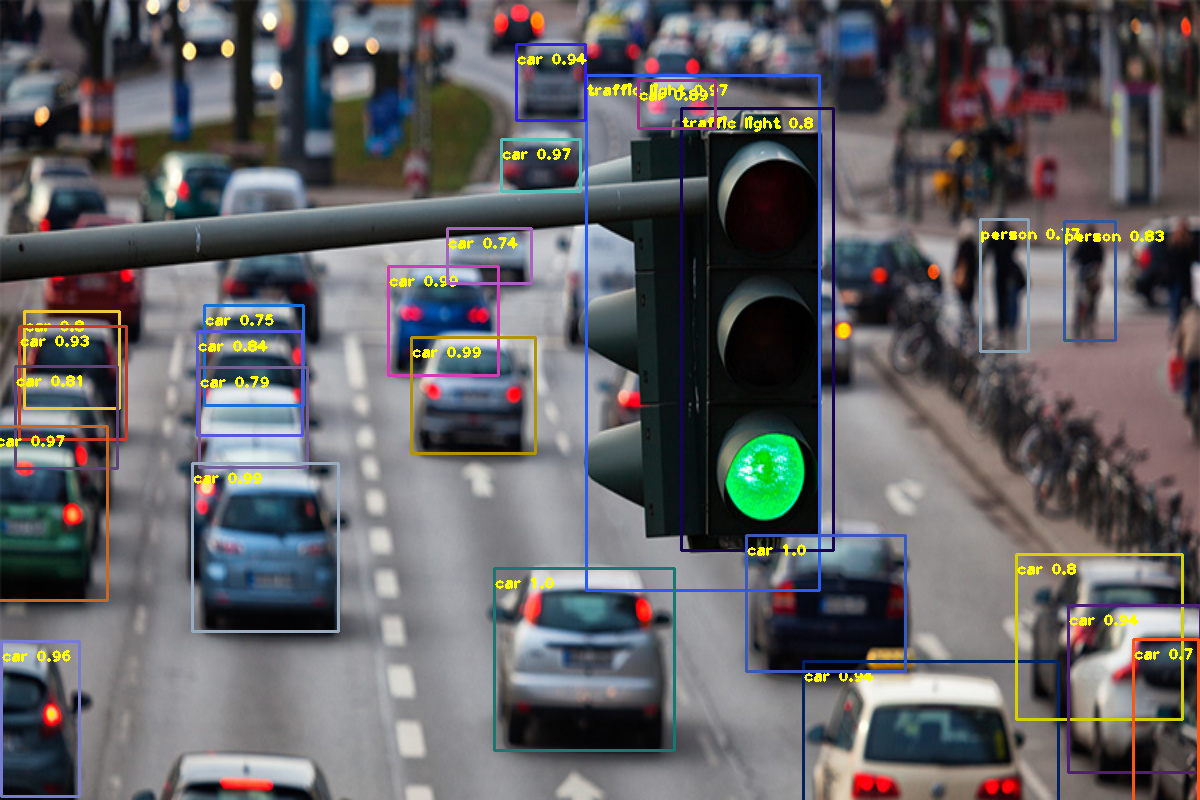

In [21]:
#to eliminate multiple detections for same object
#using non - max suppression
#anything with IOU_threshold < 0.6 will be removed
indexes = cv.dnn.NMSBoxes(boxes,confidences,0.4,0.6) 

# to loop over all the boxes
font = cv.FONT_HERSHEY_PLAIN
colors= np.random.uniform(0,255,size= (len(boxes),3))
for i in range(len(boxes)):
    if i in indexes:
        x,y,ww,hh = boxes[i]
        label= str(classes[class_ids[i]])
        confi = str(round(confidences[i],2))
        color = colors[i]
        cv.rectangle(img,(x,y),(x+ww,y+hh),color,2)
        cv.putText(img,label+" "+ confi,(x,y+20),font,1,(0,255,255),2)
cv2_imshow(img)
cv.waitKey(0)
cv.destroyAllWindows()


### Conclusion

*Here, we used YOLO3 for object detector and visualize the output*


# **Pytesseract**

Python-tesseract(pytesseract) is an optical character recognition (OCR) tool for python. That is, it will recognize and “read” the text embedded in images.

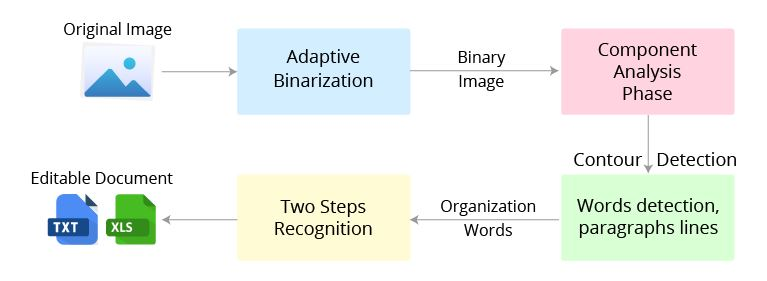

Python-tesseract is a wrapper for Google’s Tesseract-OCR Engine. It is also useful as a stand-alone invocation script to tesseract, as it can read all image types supported by the Pillow and Leptonica imaging libraries, including jpeg, png, gif, bmp, tiff, and others. Additionally, if used as a script, Python-tesseract will print the recognized text instead of writing it to a file.

## Optical Character Recognition (OCR)
*Character detector which extracts printed or handwritten text from an image or video. We will use pytesseract to perform this task*

In [22]:
!pip install tesseract
!sudo apt install tesseract-ocr

     |████████████████████████████████| 45.6MB 66kB/s 
  Created wheel for tesseract: filename=tesseract-0.1.3-cp37-none-any.whl size=45562571 sha256=34e2a48ce354c78a87dfa7dedac0c7b32ebb55bca2ace39cdcd9710f26e86ef8
  Stored in directory: /root/.cache/pip/wheels/82/1f/d9/24797b123379e4ea9511cf660835468b62dad609634cad2aba
Successfully built tesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe am

In [23]:
! pip install pillow
! pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=d66802b3efc7cd3630574878cc143a41ecfb5a3d7499bb18645dd821216e0c58
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract


### STEP 1 - Importing the Libraries

In [24]:
import pytesseract
from pytesseract import Output

### STEP 2 - Loading & Plotting the image

The type of this input is <class 'numpy.ndarray'>
Shape: (1202, 850, 3)


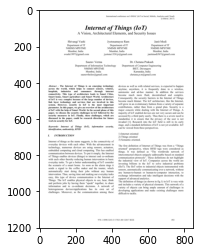

In [25]:
image = cv2.imread('/content/drive/MyDrive/Grip/largepreview.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

### STEP 3 - Converting BGR image to grayscale.

(-0.5, 849.5, 1201.5, -0.5)

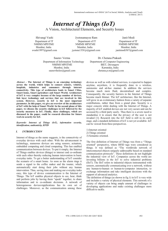

In [26]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
plt.axis('off')

### STEP 4 - Performing OCR

In [27]:
print(pytesseract.image_to_string(image))

Intemational conference on I-SMAC (IoT in Social, Mobile, Analytics and Cloud)

(U-SMAC 2017)
Internet of Things (IoT)
A Vision, Architectural Elements, and Security Issues
Shivangi Vashi Jyotsnamayee Ram Janit Modi
Department of IT Department of IT Department of IT
MIMS MPSTME NMIMS MPSTME NMIMS MPSTME
Mumbai, India Mumbai, India Mumbai, India

svashi1997@gmail.com

Saurav Verma

Department of Information Technology

MIMS MPSTME
Mumbai, India
sauravtheleo@gmail.com

Abstract ~ The Internet of Things is an emerging technology
across the world, which helps to connect sensors, vehicles,
hospitals, industries and consumers through internet
connectivity. This type of architecture leads to Smart Cities,
Smart home, Smart agriculture and Smart World. Architecture
if ToT Is very complex because of the large number of devices,
link layer technology and services that are involved in this
system. However, security in oT is the most important
parameter. In this paper, we give an overview of the a

### STEP 5 - Visualizing output
*Get bounding box to visualize which part of image is recognized by pytesseract*

In [28]:
h, w, d = image.shape
boxes = pytesseract.image_to_boxes(image) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 1)

(-0.5, 849.5, 1201.5, -0.5)

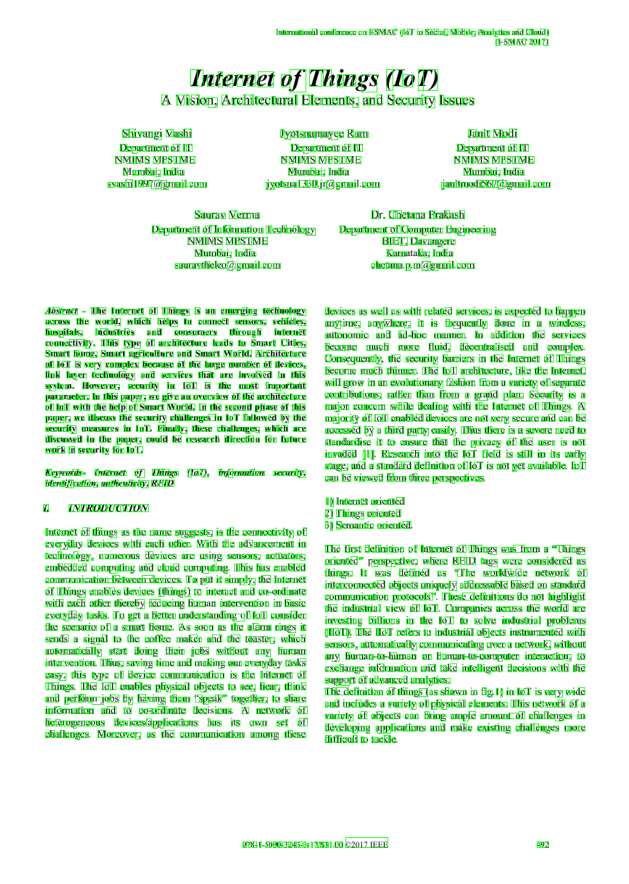

In [29]:
plt.figure(figsize=(20,16))
plt.imshow(img)
plt.axis('off')

### Conclusion

*Here, we used pytesseract for optical character recognition and visualize the output*

# Thank You